In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from ydata_profiling import ProfileReport
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
%matplotlib inline

In [348]:
df=pd.read_excel('autos_dataset.xlsx')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [349]:
df.replace('?',np.nan,inplace=True)
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [350]:
a=['normalized-losses','bore','stroke','horsepower','peak-rpm','price'] #columns with null

In [351]:
for i in a:
    df[i].fillna(df[i].median(),inplace=True) #replacing null values with median

In [352]:
df['num-of-doors'].fillna('four',inplace=True) #replacing null str value with str

In [353]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [354]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [355]:
b=df.describe().columns
b

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [356]:
c=['normalized-losses','wheel-base','width','engine-size','stroke','compression-ratio','horsepower',
  'peak-rpm','city-mpg'] #columns num with outliers

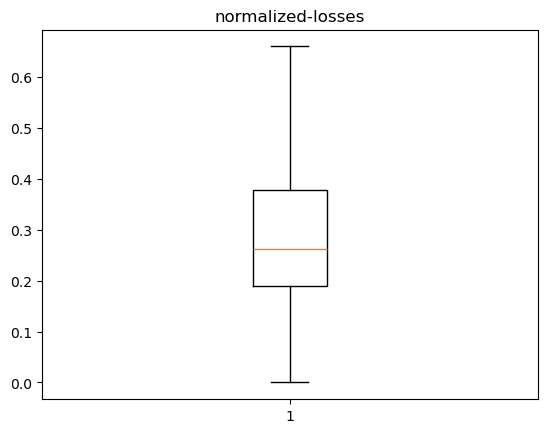

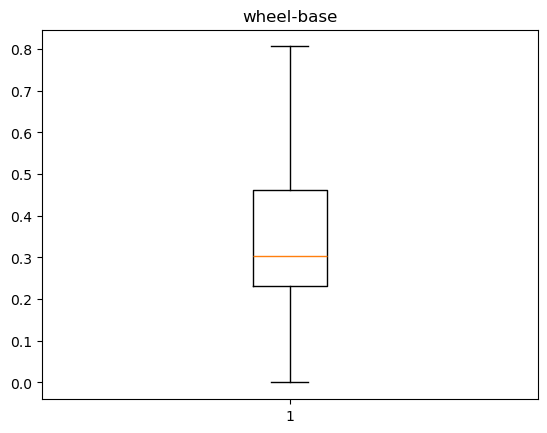

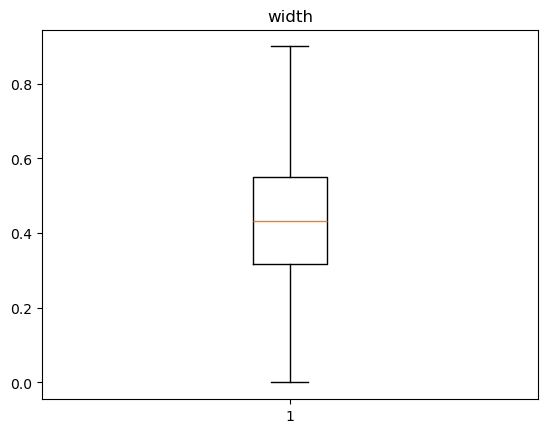

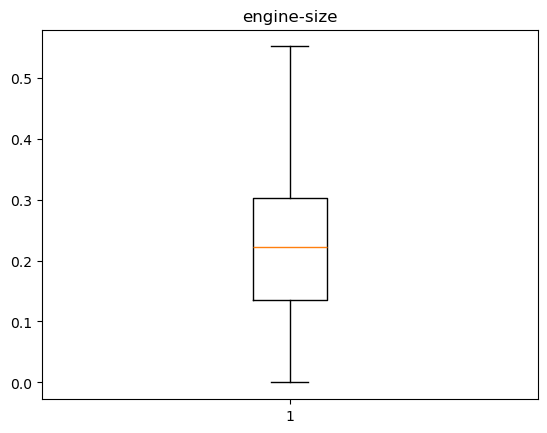

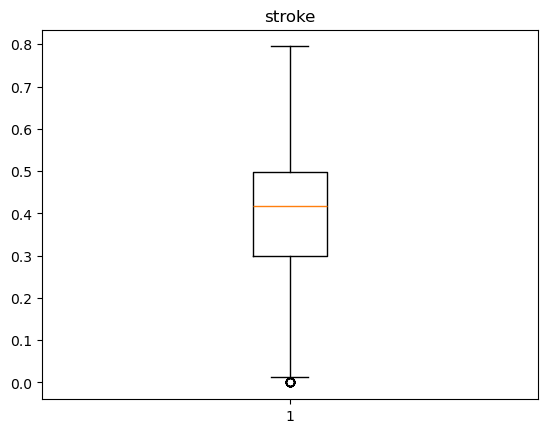

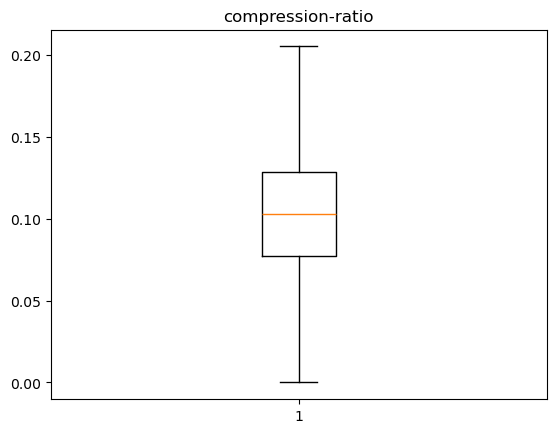

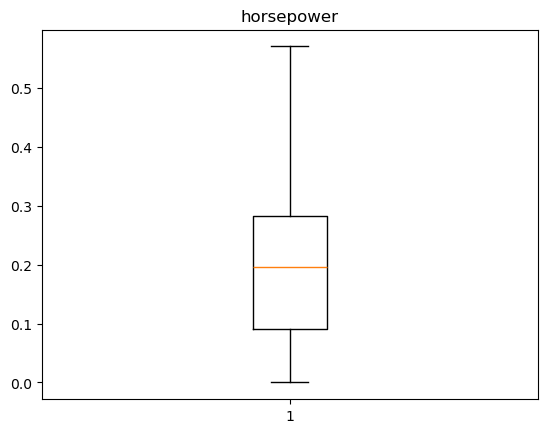

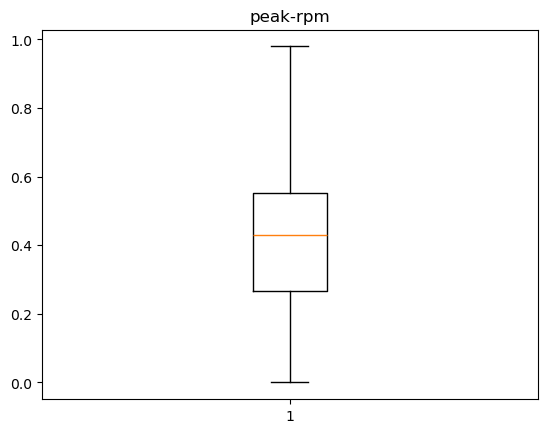

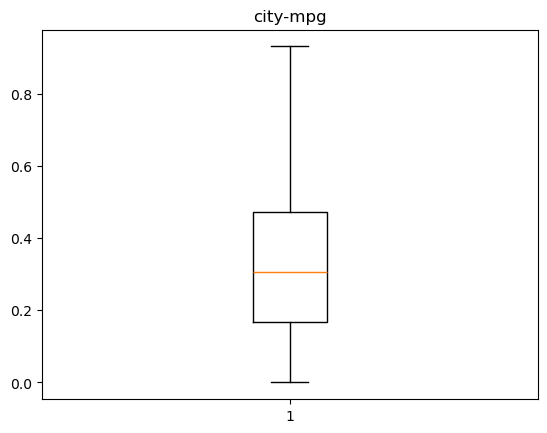

In [385]:
for i in c: #removing outliers
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr

    df.loc[df[i]<lower,i]=lower

In [358]:
df.info() #obj columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [386]:
p=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']

In [387]:
r=LabelEncoder()

In [388]:
for i in p:
    df[i]=r.fit_transform(df[i])

In [396]:
d=['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']

In [397]:
u=MinMaxScaler()

In [398]:
for i in d:
    df[i]=u.fit_transform(df[[i]])

In [365]:
df['price']=np.log(df['price'])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.261780,0,1,0,1,0,2,0,0.058309,...,0.260377,5,0.664286,0.013245,0.102564,0.262500,0.346939,0.222222,0.289474,9.510075
1,1.0,0.261780,0,1,0,1,0,2,0,0.058309,...,0.260377,5,0.664286,0.013245,0.102564,0.262500,0.346939,0.222222,0.289474,9.711116
2,0.6,0.261780,0,1,0,1,2,2,0,0.230321,...,0.343396,5,0.100000,0.536424,0.102564,0.441667,0.346939,0.166667,0.263158,9.711116
3,0.8,0.518325,1,1,0,0,3,1,0,0.384840,...,0.181132,5,0.464286,0.490066,0.166667,0.225000,0.551020,0.305556,0.368421,9.543235
4,0.8,0.518325,1,1,0,0,3,0,0,0.373178,...,0.283019,5,0.464286,0.490066,0.038462,0.279167,0.551020,0.138889,0.157895,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.157068,21,1,0,0,3,2,0,0.655977,...,0.301887,5,0.885714,0.324503,0.134615,0.275000,0.510204,0.277778,0.315789,9.731809
201,0.2,0.157068,21,1,1,0,3,2,0,0.655977,...,0.301887,5,0.885714,0.324503,0.083333,0.466667,0.469388,0.166667,0.236842,9.854560
202,0.2,0.157068,21,1,0,0,3,2,0,0.655977,...,0.422642,5,0.742857,0.139073,0.089744,0.358333,0.551020,0.138889,0.184211,9.975110
203,0.2,0.157068,21,0,1,0,3,2,0,0.655977,...,0.316981,3,0.335714,0.490066,1.000000,0.241667,0.265306,0.361111,0.289474,10.019936


In [399]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.396825,0,1,0,1,0,2,0,0.072333,...,0.472603,5,0.664286,0.016667,0.50000,0.459854,0.354167,0.238806,0.289474,9.510075
1,1.0,0.396825,0,1,0,1,0,2,0,0.072333,...,0.472603,5,0.664286,0.016667,0.50000,0.459854,0.354167,0.238806,0.289474,9.711116
2,0.6,0.396825,0,1,0,1,2,2,0,0.285714,...,0.623288,5,0.100000,0.675000,0.50000,0.773723,0.354167,0.179104,0.263158,9.711116
3,0.8,0.785714,1,1,0,0,3,1,0,0.477396,...,0.328767,5,0.464286,0.616667,0.81250,0.394161,0.562500,0.328358,0.368421,9.543235
4,0.8,0.785714,1,1,0,0,3,0,0,0.462929,...,0.513699,5,0.464286,0.616667,0.18750,0.489051,0.562500,0.149254,0.157895,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.238095,21,1,0,0,3,2,0,0.813743,...,0.547945,5,0.885714,0.408333,0.65625,0.481752,0.520833,0.298507,0.315789,9.731809
201,0.2,0.238095,21,1,1,0,3,2,0,0.813743,...,0.547945,5,0.885714,0.408333,0.40625,0.817518,0.479167,0.179104,0.236842,9.854560
202,0.2,0.238095,21,1,0,0,3,2,0,0.813743,...,0.767123,5,0.742857,0.175000,0.43750,0.627737,0.562500,0.149254,0.184211,9.975110
203,0.2,0.238095,21,0,1,0,3,2,0,0.813743,...,0.575342,3,0.335714,0.616667,1.00000,0.423358,0.270833,0.388060,0.289474,10.019936


In [400]:
x=df.drop('price',axis=1)
y=df['price']

In [401]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [402]:
y_test

189     9.358329
183     8.984067
118     8.625509
165     9.137555
160     8.953899
70     10.360912
173     9.099185
154     8.974365
25      8.808668
71     10.439513
77      8.730529
146     8.917713
121     8.808668
102     9.574914
47     10.381273
188     9.209840
156     8.844769
38      9.115480
162     9.133243
141     8.871505
202     9.975110
103     9.510371
34      8.871926
3       9.543235
61      9.268137
115     9.718964
14     10.109078
46      9.310005
12      9.950848
101     9.510371
51      8.715224
6       9.781885
125     9.999616
73     10.620351
58      9.657907
182     8.958669
40      9.239414
72     10.464702
4       9.767095
130     9.137232
122     8.937087
Name: price, dtype: float64

In [403]:
model=LinearRegression()

In [404]:
model.fit(x_train,y_train)

LinearRegression()

In [405]:
y_pred=model.predict(x_test)
y_pred

array([ 9.09563796,  9.00700725,  8.71987723,  9.01565819,  8.82154881,
       10.26852897,  9.14413945,  8.83013966,  8.86109183, 10.46090223,
        8.74742042,  9.01899046,  8.83497397, 10.03214626, 10.28771157,
        9.2042374 ,  8.80320749,  9.02612938,  8.81016932,  9.05420358,
       10.02134176, 10.04028009,  8.76521807,  9.50999382,  9.15440862,
        9.59760991, 10.04560166,  9.4594437 ,  9.70559945, 10.01357707,
        8.80142864,  9.81211019,  9.44800638, 10.55474803,  9.63484211,
        8.96018114,  9.17870947, 10.17717971,  9.57744878,  9.19239761,
        8.8985662 ])

In [406]:
model.score(x_train,y_train)

0.8962600331650629

In [407]:
model.score(x_test,y_test)

0.8681767214388316

In [408]:
residual=y_pred-y_test
residual

189   -0.262691
183    0.022940
118    0.094368
165   -0.121896
160   -0.132350
70    -0.092383
173    0.044954
154   -0.144225
25     0.052424
71     0.021389
77     0.016892
146    0.101278
121    0.026306
102    0.457232
47    -0.093562
188   -0.005603
156   -0.041561
38    -0.089351
162   -0.323074
141    0.182698
202    0.046231
103    0.529909
34    -0.106708
3     -0.033241
61    -0.113729
115   -0.121354
14    -0.063476
46     0.149439
12    -0.245249
101    0.503206
51     0.086205
6      0.030225
125   -0.551609
73    -0.065603
58    -0.023065
182    0.001512
40    -0.060704
72    -0.287522
4     -0.189646
130    0.055166
122   -0.038521
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Density'>

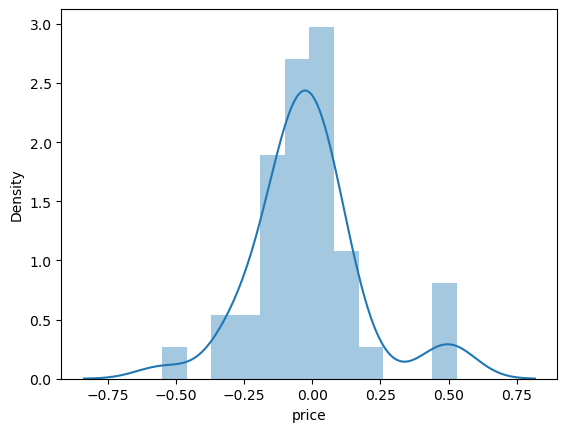

In [409]:
sns.distplot(residual)

In [410]:
#training data
y_pred_train=model.predict(x_train)
mse_train=mean_squared_error(y_train,y_pred_train)
mae_train=mean_absolute_error(y_train,y_pred_train)
train=r2_score(y_train,y_pred_train)
print('mse_train',mse_train)
print('mae_train',mae_train)
print('train r2 score',train)

mse_train 0.024040924846167863
mae_train 0.11797811729391922
train r2 score 0.8962600331650629


In [411]:
#testing data
y_pred_test=model.predict(x_test)
mse_test=mean_squared_error(y_test,y_pred_test)
mae_test=mean_absolute_error(y_test,y_pred_test)
test=r2_score(y_test,y_pred_test)
print('mse_test',mse_test)
print('mae_test',mae_test)
print('test r2 score',test)

mse_test 0.03973277468716209
mae_test 0.13730484935819684
test r2 score 0.8681767214388316


In [452]:
#regularization
l2=Ridge(1)

In [453]:
l2.fit(x_train,y_train)

Ridge(alpha=1)

In [454]:
l2.score(x_train,y_train)

0.8904497186101049

In [455]:
l2.score(x_test,y_test)

0.877501919264935

In [383]:
#classification